In [47]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [43]:
print(df.columns)


Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


In [48]:
# Define age groups
def age_group(age):
    if age == 0:
        return 'All'
    elif 1 <= age <= 16:
        return 'Teen'
    else:
        return 'Adult'
df['Age Group'] = df['Minimum Age'].apply(age_group)

df['Age Group']

0       Adult
1       Adult
2       Adult
3        Teen
4        Teen
        ...  
2504     Teen
2505     Teen
2506     Teen
2507     Teen
2508     Teen
Name: Age Group, Length: 2509, dtype: object

Epoch 1/100
57/57 [==============================] - 0s 2ms/step - loss: 2769.2390 - mae: 42.3040 - mse: 2769.2390 - val_loss: 2450.7769 - val_mae: 39.0862 - val_mse: 2450.7769
Epoch 2/100
57/57 [==============================] - 0s 923us/step - loss: 1917.9740 - mae: 34.0780 - mse: 1917.9740 - val_loss: 1288.8676 - val_mae: 27.3737 - val_mse: 1288.8676
Epoch 3/100
57/57 [==============================] - 0s 886us/step - loss: 709.8235 - mae: 19.4428 - mse: 709.8235 - val_loss: 332.8532 - val_mae: 13.2156 - val_mse: 332.8532
Epoch 4/100
57/57 [==============================] - 0s 932us/step - loss: 256.4360 - mae: 11.0951 - mse: 256.4360 - val_loss: 221.0721 - val_mae: 10.4002 - val_mse: 221.0721
Epoch 5/100
57/57 [==============================] - 0s 895us/step - loss: 208.0027 - mae: 9.7958 - mse: 208.0027 - val_loss: 208.6523 - val_mae: 10.0343 - val_mse: 208.6523
Epoch 6/100
57/57 [==============================] - 0s 807us/step - loss: 191.7607 - mae: 9.3582 - mse: 191.7607 - val_

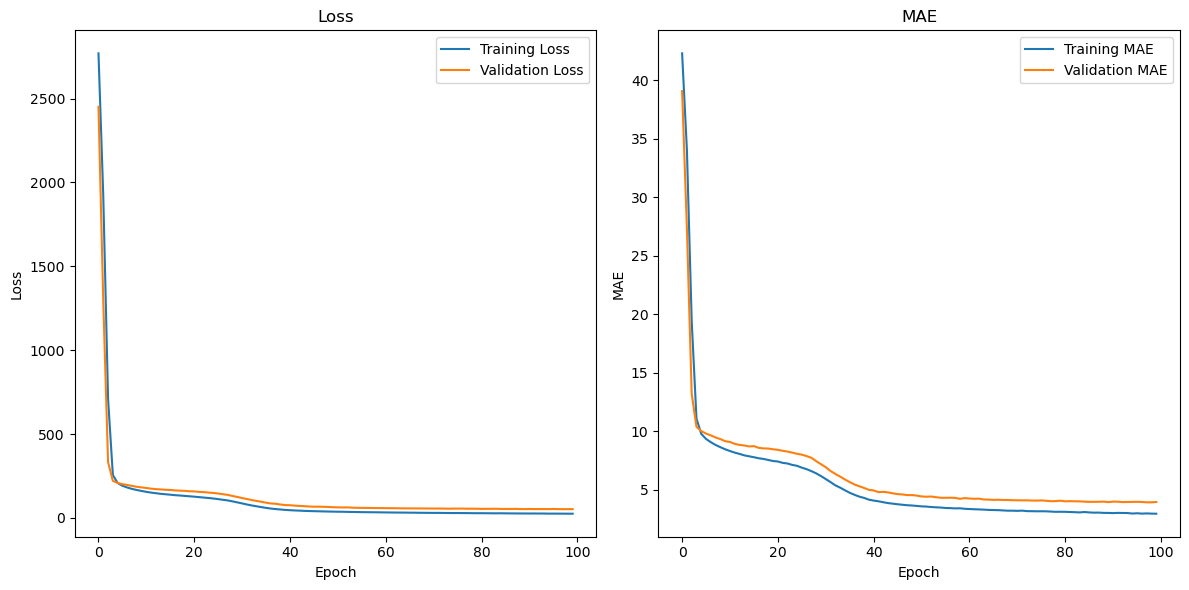

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score

# Select features
features = ['Hidden Gem Score', 'Runtime', 'Awards Received', 'Awards Nominated For',
            'Boxoffice', 'IMDb Votes', 'Minimum Age'] + \
            [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 
            'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
            'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
            'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

# Define target columns
targets = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']

X = df[features]
y = df[targets]  # y now contains all target variables

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Creation (Adjust output layer to match the number of targets)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(targets))  # Output layer with a neuron for each target
])

# Model Compilation (Use appropriate loss for multiple targets)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse']) # MSE is suitable for multiple regression targets

# Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Model Evaluation
loss, *metrics = model.evaluate(X_test, y_test, verbose=0) # *metrics unpacks MAE and MSE for each target
print(f"Test Loss: {loss}")



# Predictions
y_pred = model.predict(X_test)

# Calculate R-squared for each target
for i, target_name in enumerate(targets):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i]) # Compare corresponding columns
    print(f"R-squared ({target_name}): {r2}")




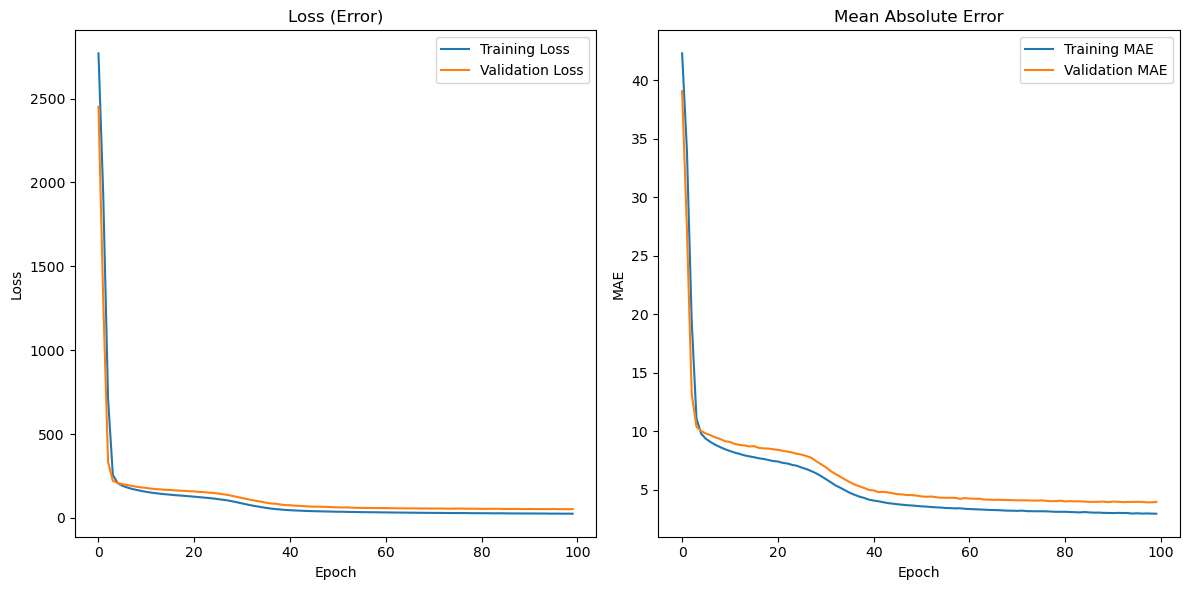

In [46]:
# Plotting training history (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss (Error)')

# Plot MAE (for the first target - you can add more plots for other targets)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error')

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

In [51]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingGridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor  # Important!
from sklearn.metrics import mean_squared_error, r2_score

# Select features
features = ['Hidden Gem Score', 'Runtime', 'Awards Received', 'Awards Nominated For',
            'Boxoffice', 'IMDb Votes', 'Minimum Age'] + \
            [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 
            'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
            'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
            'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]

# Define target columns
targets = ['IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']

X = df[features]
y = df[targets]  # y now contains all target variables

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 1. Create a function that builds your Keras model:
def build_model(units1=64, units2=32, learning_rate=0.001):  # Add hyperparameters as arguments
    model = keras.Sequential([
        layers.Dense(units1, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.2), # Example dropout
        layers.Dense(units2, activation='relu'),
        layers.Dense(len(targets))
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)  # Use the passed learning rate
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    return model

# 2. Wrap your Keras model in a KerasRegressor:
keras_reg = KerasRegressor(build_fn=build_model)

# 3. Define your hyperparameter grid:
param_grid = {
    'units1': [32, 64, 128],  # Number of neurons in the first layer
    'units2': [16, 32, 64],   # Number of neurons in the second layer
    'learning_rate': [0.001, 0.0001, 0.01], # Learning Rate
    'epochs': [50, 100, 200],  # Number of epochs (HalvingGridSearchCV will handle early stopping)
    'batch_size': [16, 32, 64]   # Batch size
}

# 4. Create the HalvingGridSearchCV object:
halving_cv = HalvingGridSearchCV(
    keras_reg,
    param_grid,
    cv=3,  # Number of cross-validation folds
    factor=3,  # Reduction factor (how many combinations are kept in each iteration)
    max_resources=200, # Maximum epochs to train for
    min_resources=50, # Minimum epochs to train for
    scoring='neg_mean_squared_error',  # Scoring metric (important for regression)
    verbose=1,  # For progress updates
    n_jobs=-1 # Use all available processors
)

# 5. Fit the HalvingGridSearchCV object:
halving_cv.fit(X_train, y_train)

# 6. Get the best model and hyperparameters:
best_model = halving_cv.best_estimator_
best_params = halving_cv.best_params_

print("Best Hyperparameters:", best_params)

# 7. Evaluate the best model on the test set:
y_pred = best_model.predict(X_test)

# Calculate metrics as before
loss, *metrics = best_model.model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

num_targets = len(targets)
for i in range(num_targets):
    mae = metrics[i * 2]
    mse = metrics[i * 2 + 1]
    print(f"Test MAE ({targets[i]}): {mae}")
    print(f"Test MSE ({targets[i]}): {mse}")

for i, target_name in enumerate(targets):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"R-squared ({target_name}): {r2}")

# Predictions
y_pred = model.predict(X_test)

# Calculate R-squared for each target
for i, target_name in enumerate(targets):
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i]) # Compare corresponding columns
    print(f"R-squared ({target_name}): {r2}")




n_iterations: 2
n_required_iterations: 5
n_possible_iterations: 2
min_resources_: 50
max_resources_: 200
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 243
n_resources: 50
Fitting 3 folds for each of 243 candidates, totalling 729 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


# A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.